In [1]:
import pandas as pd
import numpy as np
import os
os.chdir(r"C:\Training\Academy\Statistics (Python)\Datasets")
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import Holt
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import root_mean_squared_error

### Monthly Milk Production

In [3]:
milk = pd.read_csv("monthly-milk-production-pounds-p.csv", index_col=0)
y = milk['Milk']
y_train = y[:-12]
y_test = y[-12:]
y_train.shape, y_test.shape

((156,), (12,))

C:\Python\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


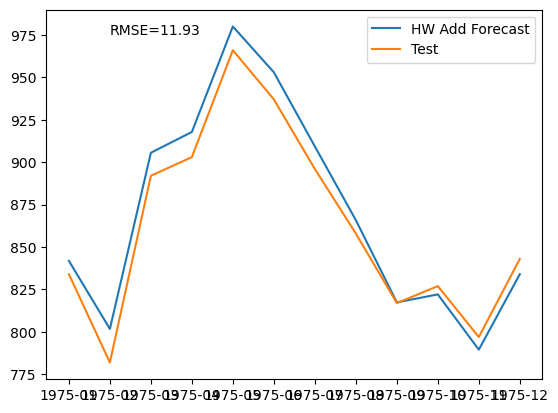

In [4]:
hw_a = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal='add')
fit3 = hw_a.fit()
fcast3 = fit3.forecast(len(y_test))
hw_a_fcast = pd.Series(fcast3, index=y_test.index)
error = round(root_mean_squared_error(y_test, hw_a_fcast), 2)
plt.text(1,975, "RMSE="+str(error))
plt.plot(hw_a_fcast, label='HW Add Forecast')
plt.plot(y_test, label='Test')
plt.legend(loc='best')
plt.show()

C:\Python\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


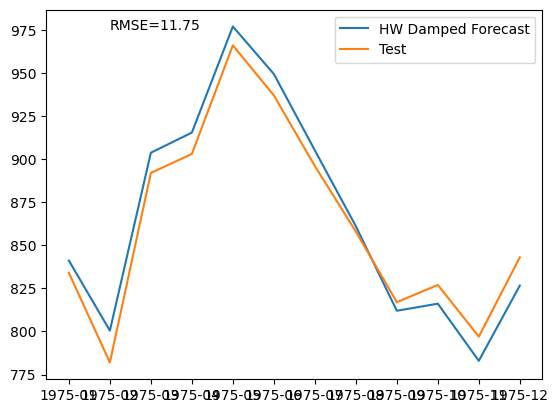

In [5]:
hw_m = ExponentialSmoothing(y_train, seasonal_periods=12, 
                            trend='add', seasonal='add', damped_trend=True)
fit3 = hw_m.fit()
fcast3 = fit3.forecast(len(y_test))
hw_m_fcast = pd.Series(fcast3, index=y_test.index)
error = round(root_mean_squared_error(y_test, hw_m_fcast), 2)
plt.text(1,975, "RMSE="+str(error))
plt.plot(hw_m_fcast, label='HW Damped Forecast')
plt.plot(y_test, label='Test')
plt.legend(loc='best')
plt.show()

Resampling the series as yearly

In [7]:
milk = pd.read_csv("monthly-milk-production-pounds-p.csv", index_col=0)
y = milk['Milk']
y.index = pd.DatetimeIndex( y.index ).to_period("M")
type(y.index)

pandas.core.indexes.period.PeriodIndex

C:\Users\Sanjay Sane\AppData\Local\Temp\ipykernel_15184\4071229196.py:1: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  y_yearly = y.resample('Y').sum()


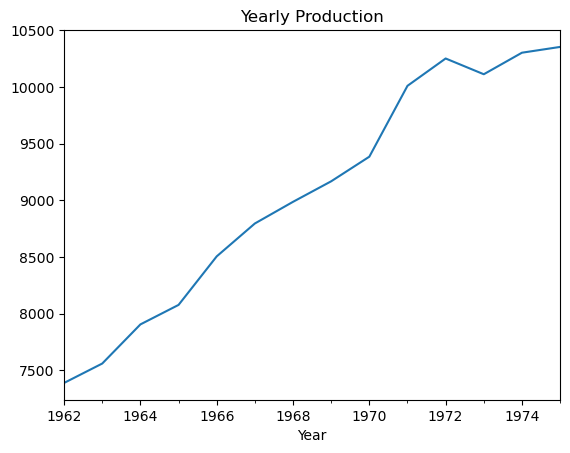

In [8]:
y_yearly = y.resample('Y').sum()
y_yearly.index.rename('Year', inplace=True)
y_yearly.plot()
plt.title("Yearly Production")
plt.show()

In [9]:
y_train = y_yearly[:-3]
y_test = y_yearly[-3:]
y_train.shape, y_test.shape

((11,), (3,))

In [10]:
y_test

Year
1973    10111
1974    10301
1975    10352
Freq: Y-DEC, Name: Milk, dtype: int64

C:\Python\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


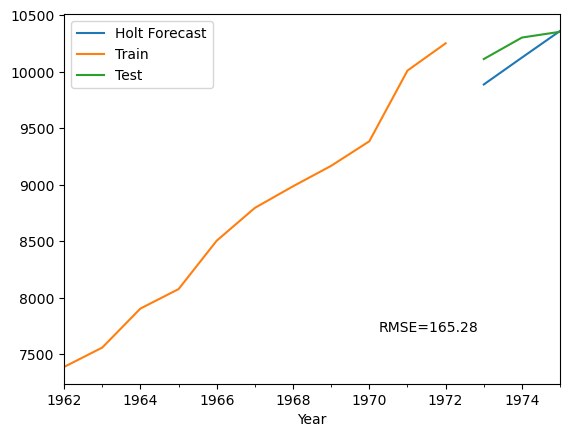

In [11]:
alpha, beta, phi = 0.1, 0.3, 0.99
holt = Holt(y_train, damped_trend=True)
fit1 = holt.fit(smoothing_level=alpha, smoothing_trend=beta, damping_trend=phi)
fcast1 = fit1.forecast(len(y_test))
holt_fcast = pd.Series(fcast1, index=y_test.index)
error = round(root_mean_squared_error(y_test, holt_fcast), 2)
holt_fcast.plot(label='Holt Forecast')
y_train.plot(label='Train')
y_test.plot(label='Test')
plt.text(0.25,7700, "RMSE="+str(error))
plt.legend(loc='best')
plt.show()

In [12]:
fit1.params

{'smoothing_level': 0.1,
 'smoothing_trend': 0.3,
 'smoothing_seasonal': nan,
 'damping_trend': 0.99,
 'initial_level': 7389.0,
 'initial_trend': 171.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

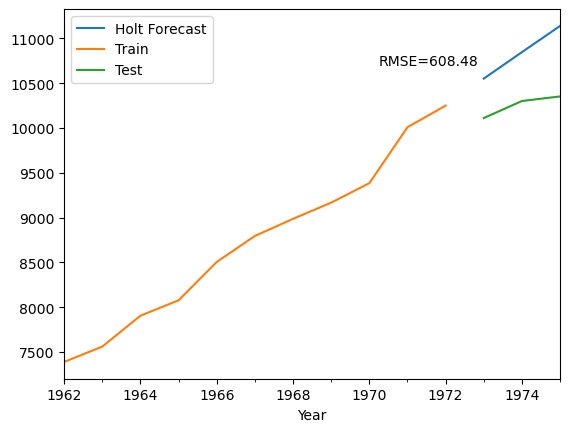

In [13]:

holt = Holt(y_train, damped_trend=True)
fit1 = holt.fit()
fcast1 = fit1.forecast(len(y_test))
holt_fcast = pd.Series(fcast1, index=y_test.index)
error = round(root_mean_squared_error(y_test, holt_fcast), 2)
holt_fcast.plot(label='Holt Forecast')
y_train.plot(label='Train')
y_test.plot(label='Test')
plt.text(0.25,10700, "RMSE="+str(error))
plt.legend(loc='best')
plt.show()

### Monthly Beer Production

In [29]:
beer = pd.read_csv("monthly-beer-production-in-austr.csv", index_col=0)
y = beer['Monthly beer production']
y_train = y[:-24]
y_test = y[-24:]
y_train.shape, y_test.shape

((452,), (24,))

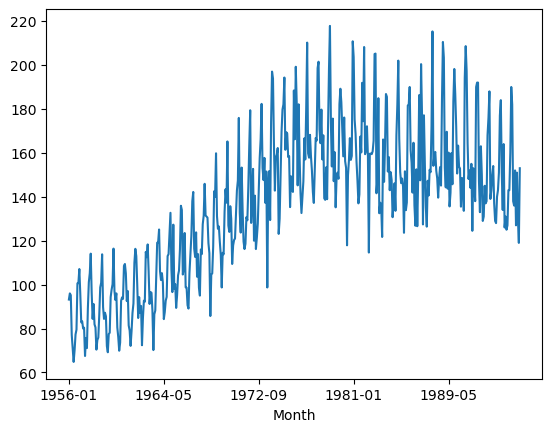

In [31]:
y.plot()
plt.show()

C:\Python\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


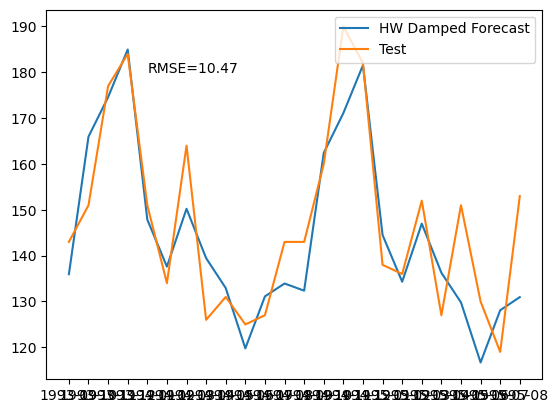

In [35]:
hw_m = ExponentialSmoothing(y_train, seasonal_periods=12, 
                            trend='add', seasonal='add', damped_trend=True)
fit3 = hw_m.fit()
fcast3 = fit3.forecast(len(y_test))
hw_m_fcast = pd.Series(fcast3, index=y_test.index)
error = round(root_mean_squared_error(y_test, hw_m_fcast), 2)
plt.text(4,180, "RMSE="+str(error))
plt.plot(hw_m_fcast, label='HW Damped Forecast')
plt.plot(y_test, label='Test')
plt.legend(loc='best')
plt.show()

#### Using Box Cox Transformation

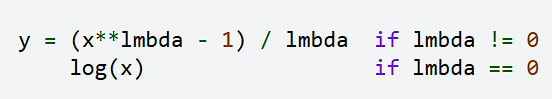

In [170]:
from scipy.special import boxcox, inv_boxcox
lamb = 0.1
y = beer['Monthly beer production']
y_trans = boxcox(y, lamb)
y_train = y_trans[:-24]
y_test = y_trans[-24:]
y_train.shape, y_test.shape

((452,), (24,))

C:\Python\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


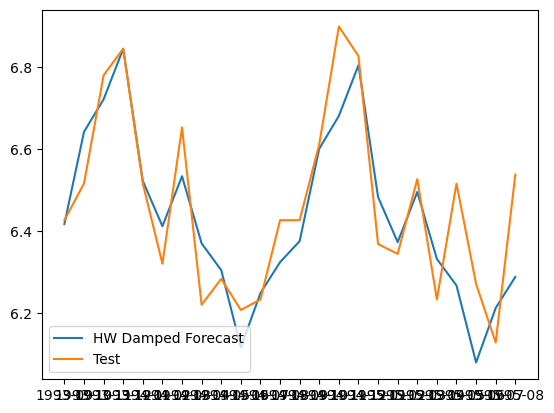

In [164]:
hw_m = ExponentialSmoothing(y_train, seasonal_periods=12, 
                            trend='add', seasonal='add', damped_trend=True)
fit3 = hw_m.fit()
fcast3 = fit3.forecast(len(y_test))
hw_m_fcast = pd.Series(fcast3, index=y_test.index)
plt.plot(hw_m_fcast, label='HW Damped Forecast')
plt.plot(y_test, label='Test')
plt.legend(loc='best')
plt.show()

In [166]:
error = round(root_mean_squared_error(inv_boxcox(y_test, 0.1), inv_boxcox(hw_m_fcast, lamb)), 2)
error

10.33